## Homework - Machine Learning Preparation
### Agi Rahmawandi <br> Batch 57



In [77]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.5
pandas version :  2.2.3
seaborn version :  0.13.2


In [65]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


### Load data

In [78]:
df = pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

## 1. Descriptive Statistics (5 poin)
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [79]:
## pengelompokan berdasar jenis kolom
obj = ['brand','category']
numbs = ['rating','number_of_reviews','love','price','value_price']

In [80]:
df[obj].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [70]:
df[numbs].describe()

,rating,number_of_reviews,love,price,value_price
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [71]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [72]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
4253,2045698,Lancôme,Lip Gloss,4.5,27.0,9500.0,26.0,26.0,0
7138,2249720,Yves Saint Laurent,Rollerballs & Travel Size,4.0,53.0,8700.0,30.0,30.0,1
1957,1765239,Drunk Elephant,Face Serums,4.0,2000.0,198000.0,80.0,80.0,1
7000,2238509,Sephora Favorites,Perfume Gift Sets,3.5,23.0,7900.0,65.0,100.0,1
902,1484989,Bobbi Brown,Eyeshadow,4.5,471.0,58500.0,30.0,30.0,0


A. Type data dan nama kolom rata-rata sudah sesuai, hanya saja akan lebih baik untuk id di ubah ke obj<br>
B. kolom yang memiliki nilai kosong adalah category,rating, number_of_reviews,love,price,value_price<br>
C. dikolom number_of_reviews nilai mean dan median terlihat cukup jauh perbedaan nya **mean 303.57**, **median 56** serta **standar deviasinya** juga rentangnya cukup jauh dari mean yakni **931.7**

https://www.kaggle.com/code/mohammadfikri/product-exclusive-classification-roc-auc-87/notebook

# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

## Pendekatan Grafis

## 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). <br>Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).<br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [73]:
for col in range in obj:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    prit()

TypeError: 'bool' object is not iterable

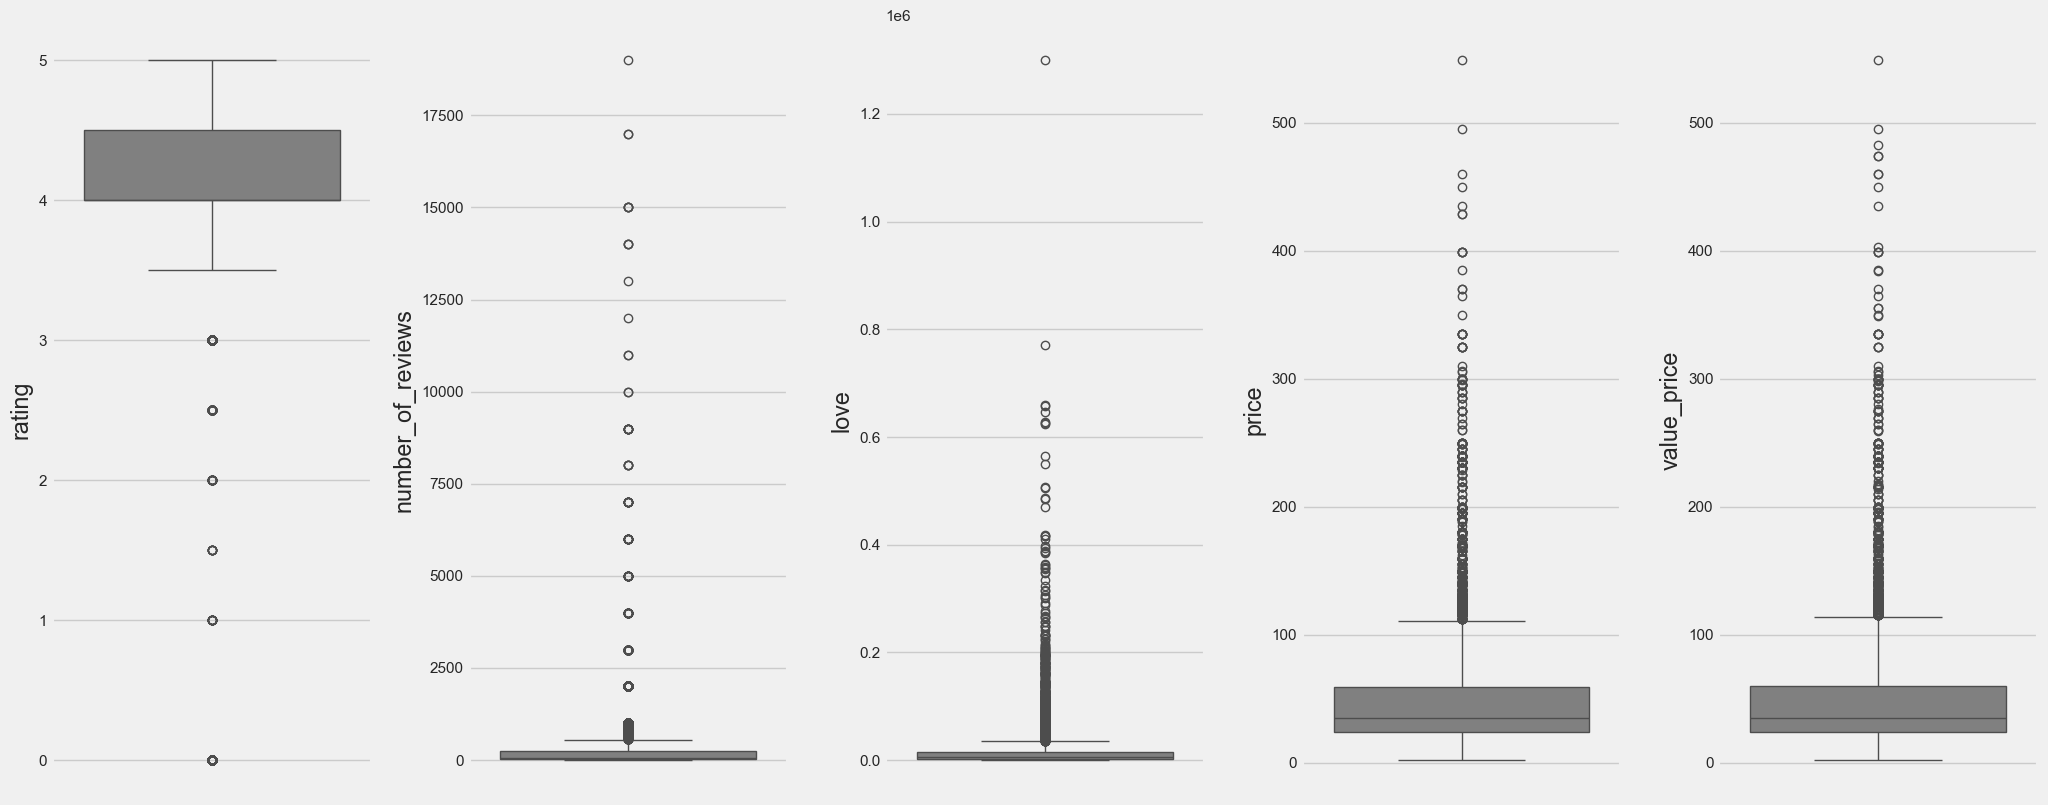

In [ ]:
for i in range(0,len(numbs)):
    plt.subplot(1,len(numbs),i+1)
    sns.boxplot(y=df[numbs[i]],color='gray',orient='v')
    plt.tight_layout()
plt.show()

In [ ]:
for i in range(0, len(numbs)):
    plt.subplot(1, len(numbs), i+1)
    sns.violinplot(y=df[numbs[i]], color='gray', orient='v')
    plt.tight_layout()


## 3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

## 4. Data Cleansing (40 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:<br>
A. Handle missing values<br>
B. Handle duplicate data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.<br>
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan
fokus menggunakan model yang robust terhadap outlier”).

### A. Missing Value 

### B. Duplicate Values 


### C. Outliers 

In [81]:
df.isnull().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [82]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['rating','number_of_reviews','love','price','value_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 5444


In [84]:
df = pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

# Pilih kolom numerik yang relevan untuk deteksi outlier
target_cols = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']

# Salin dataframe agar data asli tetap utuh
df_cleaned = df.copy()

# Tambahkan kolom penanda outlier untuk setiap kolom target menggunakan IQR
for col in target_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Kolom baru yang menandai apakah data adalah outlier
    df_cleaned[f'{col}_is_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound))

# Buat dataframe baru yang telah menghapus semua baris yang memiliki outlier di salah satu kolom
mask_no_outlier = ~df_cleaned[[f'{col}_is_outlier' for col in target_cols]].any(axis=1)
df_no_outliers = df_cleaned[mask_no_outlier]

# Ukuran dataset
print("Jumlah baris sebelum pembersihan:", df.shape[0])
print("Jumlah baris setelah pembersihan:", df_no_outliers.shape[0])


Jumlah baris sebelum pembersihan: 8000
Jumlah baris setelah pembersihan: 5557


In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5557 entries, 0 to 7998
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5557 non-null   int64  
 1   brand                         5557 non-null   object 
 2   category                      5549 non-null   object 
 3   rating                        5485 non-null   float64
 4   number_of_reviews             5548 non-null   float64
 5   love                          5535 non-null   float64
 6   price                         5550 non-null   float64
 7   value_price                   5550 non-null   float64
 8   exclusive                     5557 non-null   int64  
 9   rating_is_outlier             5557 non-null   bool   
 10  number_of_reviews_is_outlier  5557 non-null   bool   
 11  love_is_outlier               5557 non-null   bool   
 12  price_is_outlier              5557 non-null   bool   
 13  value_pr

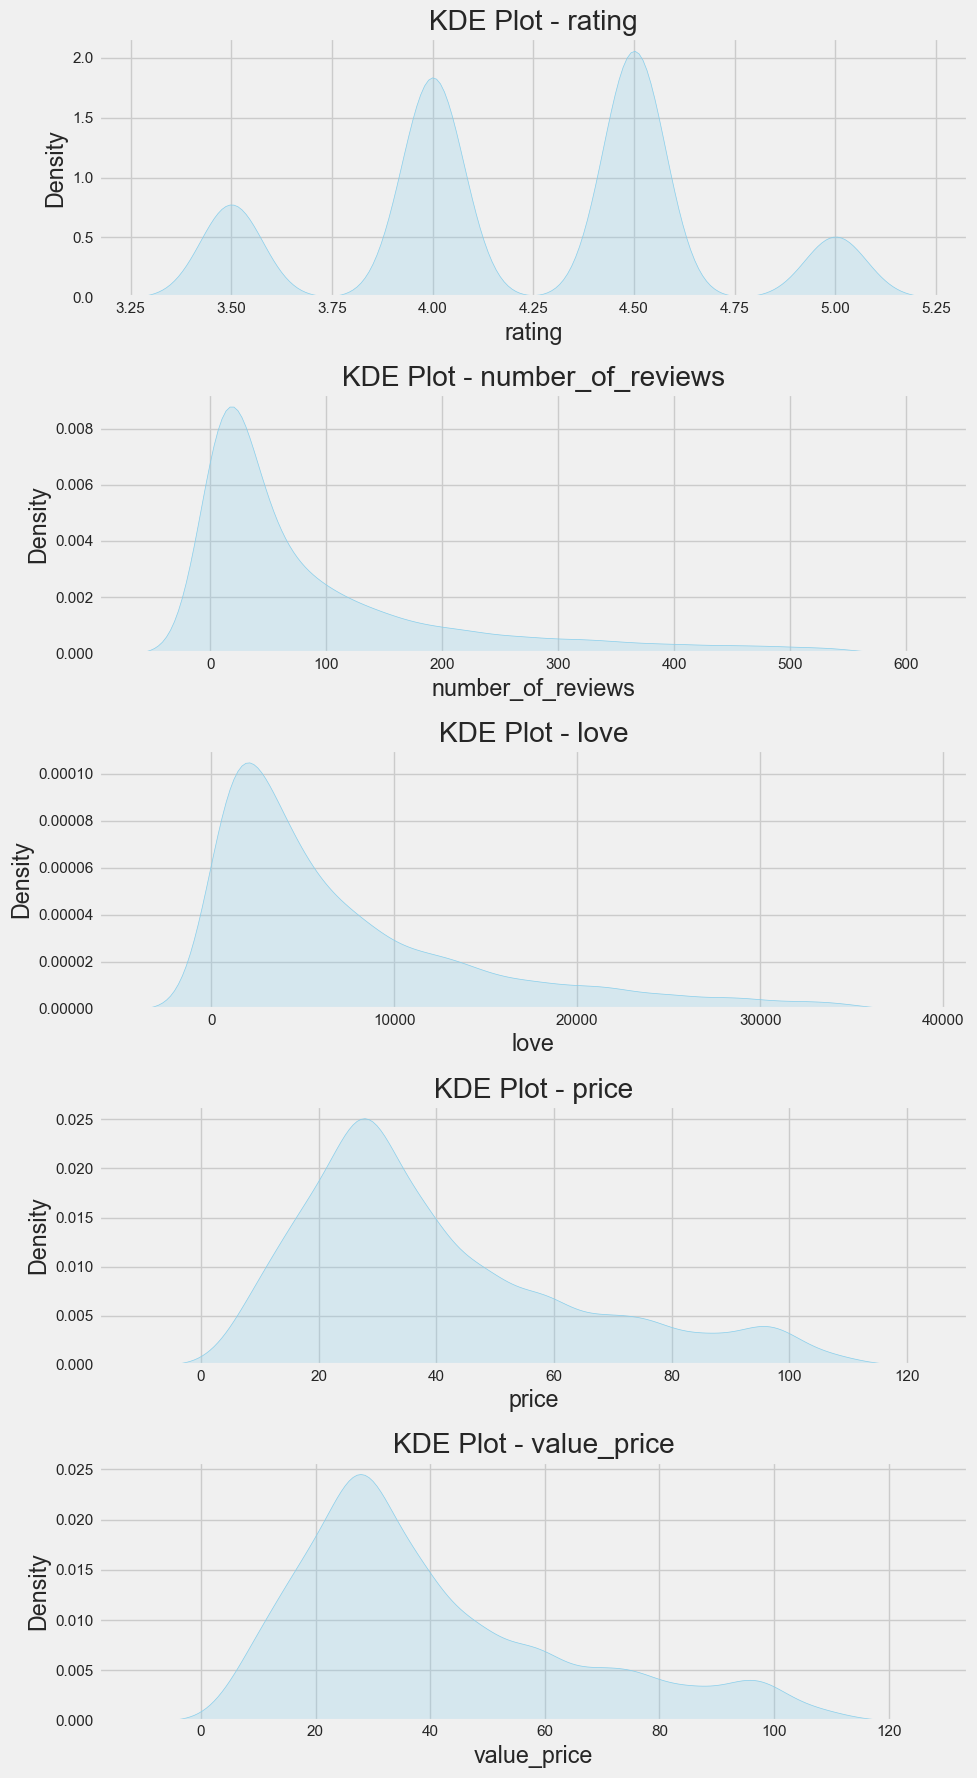

In [85]:
target_cols = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']

# Buat subplot: 1 kolom 5 baris (bisa disesuaikan)
fig, axes = plt.subplots(nrows=len(target_cols), ncols=1, figsize=(10, 18))

# Plot tiap kolom secara terpisah
for i, col in enumerate(target_cols):
    sns.kdeplot(df_no_outliers[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'KDE Plot - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

### D.Feature transformation


In [86]:
df['number_of_reviews_std'] = StandardScaler().fit_transform(df['number_of_reviews'].values.reshape(len(df), 1))
df['love_std'] = StandardScaler().fit_transform(df['love'].values.reshape(len(df), 1))
df['price_std'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))
df['value_price_std'] = StandardScaler().fit_transform(df['value_price'].values.reshape(len(df), 1))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8000 non-null   int64  
 1   brand                  8000 non-null   object 
 2   category               7987 non-null   object 
 3   rating                 7905 non-null   float64
 4   number_of_reviews      7991 non-null   float64
 5   love                   7966 non-null   float64
 6   price                  7992 non-null   float64
 7   value_price            7983 non-null   float64
 8   exclusive              8000 non-null   int64  
 9   number_of_reviews_std  7991 non-null   float64
 10  love_std               7966 non-null   float64
 11  price_std              7992 non-null   float64
 12  value_price_std        7983 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 812.6+ KB


### E. Feature encoding

In [88]:
df['brand_encoded'] = df.groupby('brand')['exclusive'].transform('mean')
df['category_encoded'] = df.groupby('category')['exclusive'].transform('mean')

In [90]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,number_of_reviews_std,love_std,price_std,value_price_std,brand_encoded,category_encoded
4831,2089829,KVD Vegan Beauty,Eyeliner,2.0,660.0,41600.0,20.0,20.0,1,0.382568,0.543180,-0.638066,-0.639226,0.772727,0.327273
7303,2258127,Together Beauty,Hair Styling Products,4.0,10.0,1100.0,26.0,26.0,1,-0.315107,-0.372062,-0.510030,-0.515438,1.000000,0.145540
1458,1671361,KVD Vegan Beauty,Eyeliner,4.0,17000.0,485600.0,21.0,21.0,1,17.921039,10.576939,-0.616727,-0.618595,0.772727,0.327273
6911,2231967,OLEHENRIKSEN,Face Masks,4.5,1000.0,32800.0,50.0,50.0,1,0.747506,0.344313,0.002114,-0.020287,1.000000,0.389908
4718,2081784,O&M,Hair Styling Products,4.5,8.0,1300.0,28.0,28.0,0,-0.317254,-0.367542,-0.467351,-0.474176,0.000000,0.145540


Tujuan penggunaan Target Encoding  :<br>
- High cardinality,dalam kolom banyak kategori  dan tidak cocok untuk One-Hot karena akan menghasilkan banyak kolom.<br>
- memiliki target biner (exclusive), sehingga:<br>

`encoded_brand = mean(exclusive∣brand)`<br>
`encoded_category =mean(exclusive∣category)`<br><br>

Artinya, tiap brand akan diganti dengan rata-rata nilai exclusive pada produk-produk brand tersebut.

### F. Handle class imbalance

In [93]:
df['exclusive'].value_counts(normalize=True)  # proporsi
df['exclusive'].value_counts()    

exclusive
0    5953
1    2047
Name: count, dtype: int64

# 5. Feature Engineering (30 poin)
Cek feature yang ada sekarang, lalu lakukan:<br>
A. Feature selection (membuang feature yang kurang relevan atau redundan)<br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada)<br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)<br>
* Untuk 5A & 5B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)<br>

### A. Feature selection

In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load data

# 2. Drop kolom kategori untuk sementara (nanti bisa kita encode)
df = df.drop(columns=['brand', 'category'])  # Kita pakai numerik dulu

# 3. Pisahkan fitur dan target
X = df.drop(columns='exclusive')
y = df['exclusive']

# 4. Normalisasi (Z-score)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 7. Ambil feature importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# 8. Tampilkan fitur terpenting
print(feature_importance)

                  feature  importance
10          brand_encoded    0.551689
11       category_encoded    0.077995
0                      id    0.076434
7                love_std    0.040535
3                    love    0.039275
6   number_of_reviews_std    0.036191
2       number_of_reviews    0.035528
5             value_price    0.033164
4                   price    0.032949
9         value_price_std    0.031050
8               price_std    0.029216
1                  rating    0.015974


In [96]:

# Hitung korelasi semua kolom terhadap 'exclusive'
corr_matrix = df.corr(numeric_only=True)

# Ambil korelasi fitur terhadap target
feature_corr = corr_matrix['exclusive'].drop('exclusive').sort_values(ascending=False)

print(feature_corr)

brand_encoded            0.799084
category_encoded         0.351914
id                       0.209206
love                     0.054244
love_std                 0.054244
number_of_reviews_std    0.005316
number_of_reviews        0.005316
rating                  -0.015293
value_price             -0.169355
value_price_std         -0.169355
price_std               -0.184988
price                   -0.184988
Name: exclusive, dtype: float64


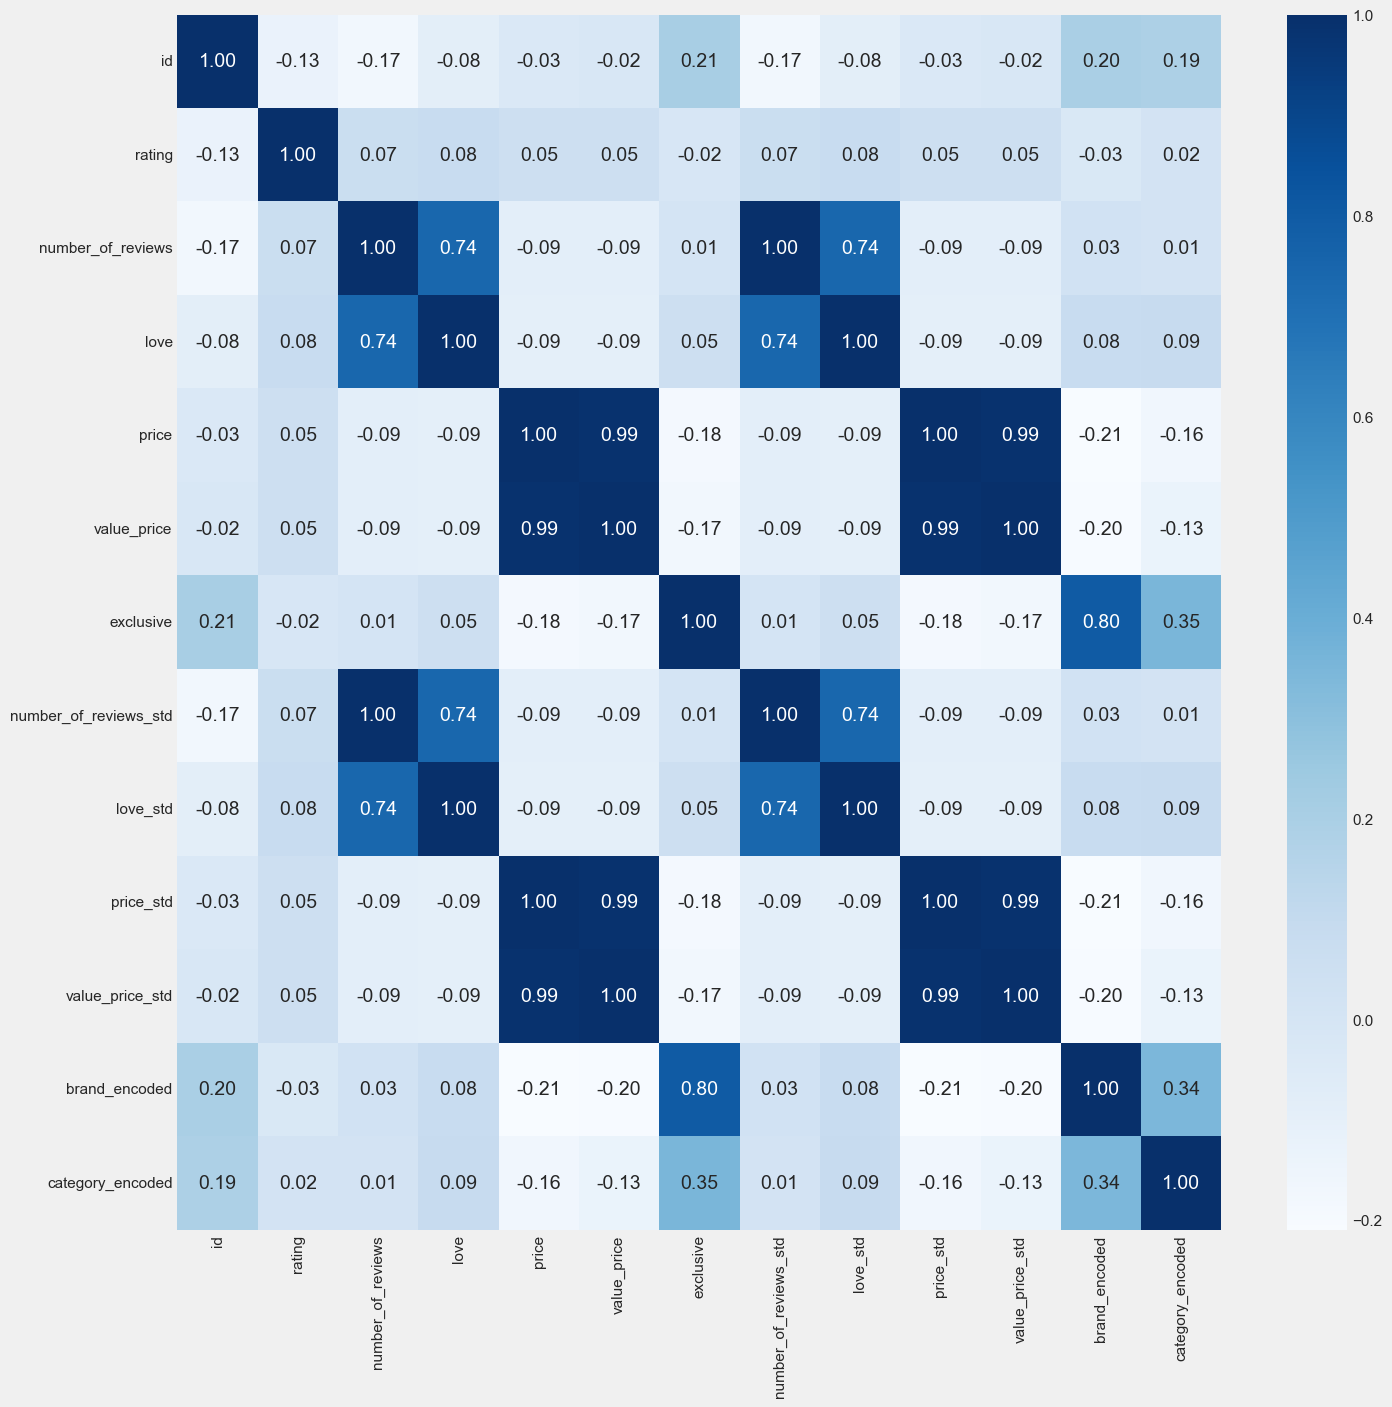

In [100]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Feature extraction

### C. feature tambahan